In [1]:
!pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.0/484.0 kB 35.3 MB/s eta 0:00

In [1]:
import os
import leafmap
from samgeo.hq_sam import (
    SamGeo,
    show_image,
    download_file,
    overlay_images,
    tms_to_geotiff,
)

In [7]:
m = leafmap.Map(center=[37.8713, -122.2580], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [8]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.2659, 37.8682, -122.2521, 37.8741]

In [9]:
m.user_roi_bounds()

[-256.1442, 13.375, -256.1371, 13.3797]

In [14]:
bbox = [-122.2600, 37.8700, -122.2550, 37.8720]

image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [ ]:
# image = '/path/to/your/own/image.tif'

In [15]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=12958551.0, center=[37.870999999999995, -122.2575], controls=(ZoomControl(options=['position', 'zoo…

In [16]:
sam = SamGeo(
    model_type="vit_h",  # can be vit_h, vit_b, vit_l, vit_tiny
    sam_kwargs=None,
)

Model checkpoint for vit_h not found.


Downloading...
From: https://github.com/opengeos/datasets/releases/download/models/sam_hq_vit_h.zip
To: /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip
100%|██████████| 1.02G/1.02G [00:12<00:00, 83.8MB/s]
Downloading...
From: https://github.com/opengeos/datasets/releases/download/models/sam_hq_vit_h.z01
To: /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.z01
100%|██████████| 1.36G/1.36G [00:14<00:00, 96.7MB/s]
INFO patool: Extracting /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip ...
INFO:patool:Extracting /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip ...
INFO patool: running /usr/bin/7z x -o/root/.cache/torch/hub/checkpoints -- /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip
INFO:patool:running /usr/bin/7z x -o/root/.cache/torch/hub/checkpoints -- /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /root/.cache/torch/hub/checkpoints/sam_hq_vit_h.zip extracted to `/root/.cache/torch/hub/che

<All keys matched successfully>


In [17]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)

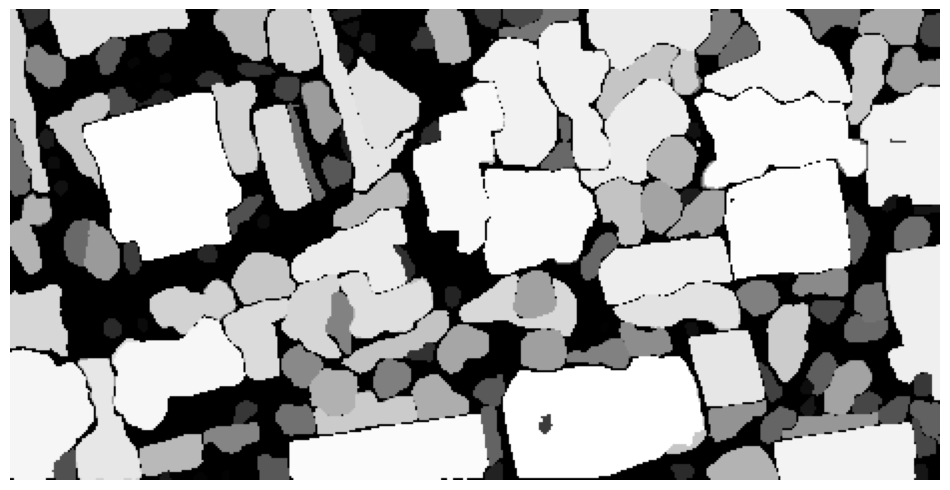

In [18]:
sam.show_masks(cmap="binary_r")

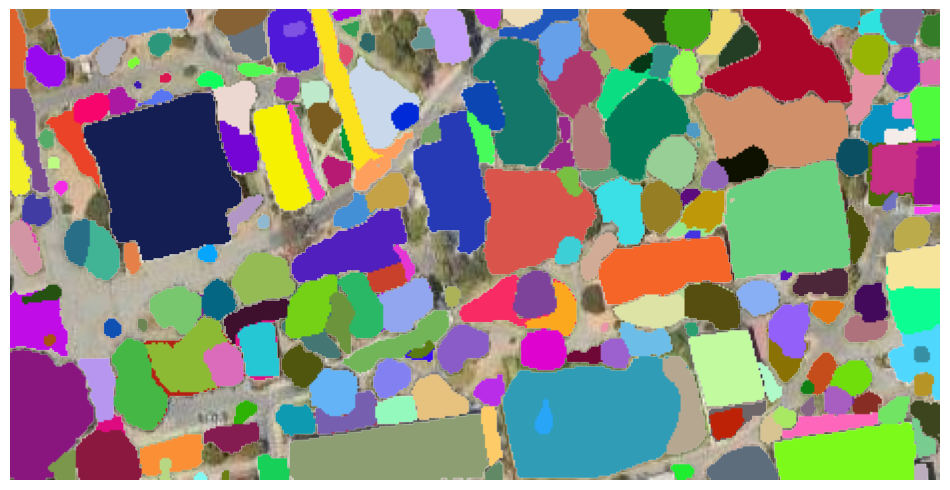

In [19]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


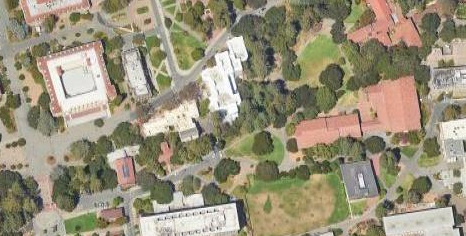
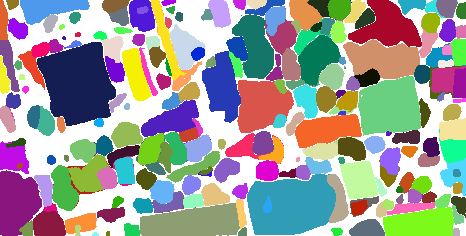

In [20]:
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

In [21]:
m.add_raster("annotations.tif", alpha=0.5, layer_name="Masks")
m

Map(bottom=12958551.0, center=[37.870999999999995, -122.2575], controls=(ZoomControl(options=['position', 'zoo…

In [22]:
sam.tiff_to_vector("masks.tif", "masks.gpkg")

In [23]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}

In [24]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

<All keys matched successfully>


In [25]:
sam.generate(image, output="masks2.tif", foreground=True)

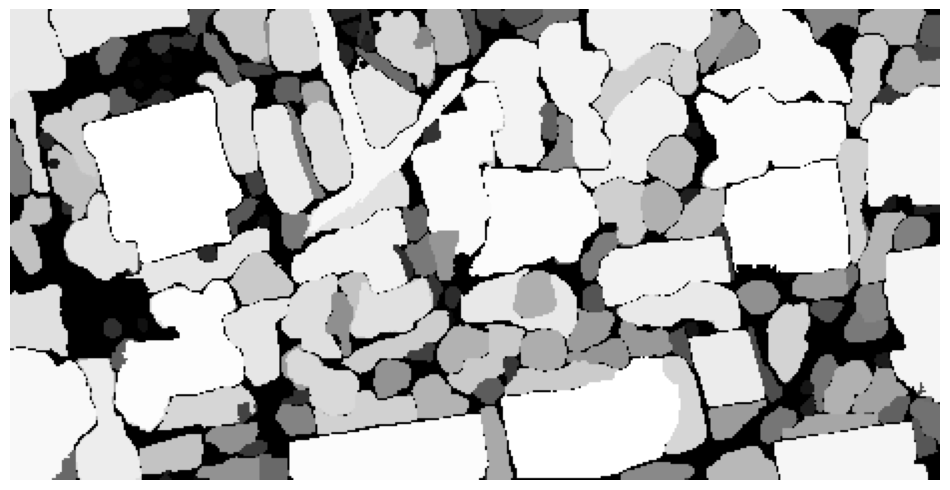

In [26]:
sam.show_masks(cmap="binary_r")

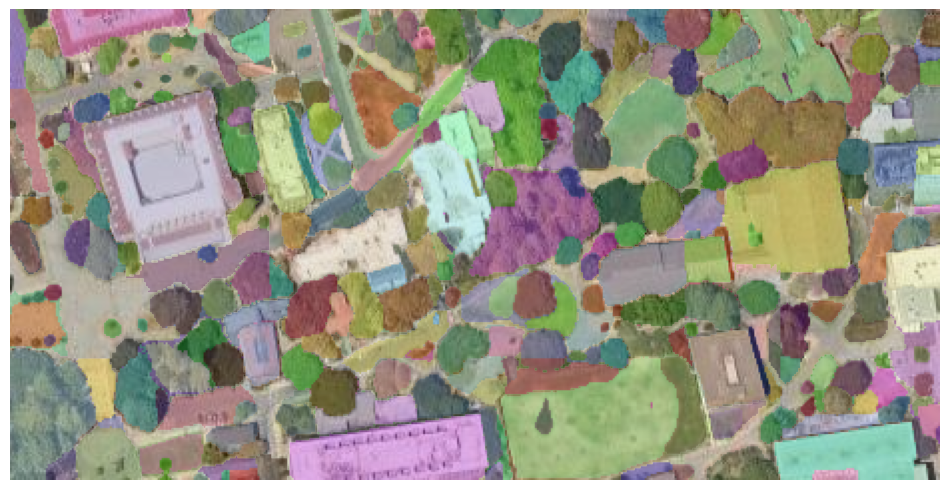

In [27]:
sam.show_anns(axis="off", opacity=1, output="annotations2.tif")


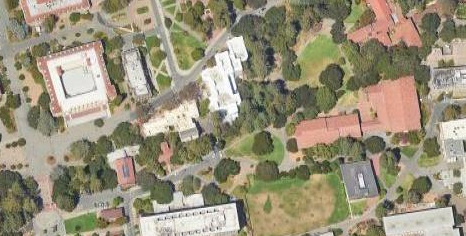
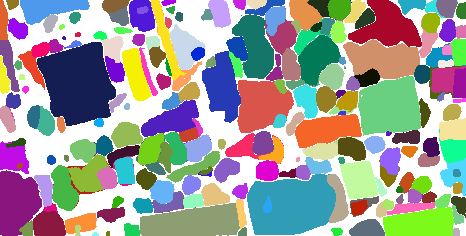

In [28]:
leafmap.image_comparison(
    image,
    "annotations.tif",
    label1="Image",
    label2="Image Segmentation",
)

In [29]:
overlay_images(image, "annotations2.tif", backend="TkAgg")

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.
